# Questiions:


1. Why is your proposal important in today's world? How predicting a good client is worthy for a bank?

Predicting a good client is important for a bank because it helps to minimize the risk of default on loans or credit card payments, which can result in financial losses for the bank. By accurately predicting the likelihood of a client defaulting, the bank can make informed decisions on whether or not to approve an application for a loan or credit card. This can save the bank time and resources, as well as prevent financial losses.

2. How is it going to impact the banking sector?


Implementing a predictive model to evaluate credit card applications can have a significant impact on the banking sector. By accurately predicting which clients are likely to default, banks can reduce their risk of financial losses and improve their overall profitability. Additionally, this can lead to better customer satisfaction, as clients who are more likely to be approved for credit cards or loans are more likely to be satisfied with the bank's services.

3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

One potential gap in knowledge is how the proposed model performs on a different dataset or with different features. It would be important to test the model's accuracy and reliability with a diverse range of data to ensure that it can be applied effectively in different situations. Additionally, it would be beneficial to explore how the model can be integrated with existing banking systems and processes to streamline the decision-making process for credit card applications. If successfully implemented, this method could be helpful for banks in India and other countries facing similar challenges related to credit card approval and risk management. Most importantly, this will cut down large paper work required, lead time, and additional human resource requirement.

# HYPOTHESIS:

Null hypothesis:


1. There is no significant relationship between the analyzed features and credit card application approval or rejection.
2. There is no significant difference in the accuracy of credit card application approval or rejection prediction between different machine learning models.
3. Machine learning classification models, do not provide accurate predictions for credit card application approval or rejection.
4. Sampling techniques do not improve the performance of our machine learning models.
5. There is no significant difference between the performance of our chosen model and other possible models.

Alternate hypothesis:

1. Certain features such as employment duration, marital status, family members, and type of income have a significant impact on the approval or rejection of a credit card application.
2. There can be a significant difference in the accuracy of credit card application status prediction between different machine learning models.
3. Machine learning classification models, such as logistic regression or random forest, provide accurate predictions for credit card application approval or rejection.
4. Techniques such as oversampling or undersampling improve the performance of our machine learning models.
5. Our chosen model has a better performance than other possible models based on relevant cost functions and graph analysis.

# CODE:

In [70]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [71]:
# reading the CSV into dataframes
df1 = pd.read_csv('Credit_card.csv')
df2 = pd.read_csv("Credit_card_label.csv")

In [72]:
# merging the dataframes on ID
df = df1.merge(df2, how="left")

In [73]:
# Accumulated CSV For SQL task
df.to_csv("credit_card_total.csv",index=False)

In [4]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [5]:
# checking the null values
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [6]:
#as we have many features dropping the ones with too many missing values wont affect the accuracy
df.drop(columns = ['GENDER','Annual_income','Birthday_count','Type_Occupation'],inplace=True)

In [7]:
#checking the null values
df.isnull().sum()

Ind_ID            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

In [8]:
df.head()

,Ind_ID,Car_Owner,Propert_Owner,CHILDREN,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,Y,Y,0,Pensioner,Higher education,Married,House / apartment,365243,1,0,0,0,2,1
1,5009744,Y,N,0,Commercial associate,Higher education,Married,House / apartment,-586,1,1,1,0,2,1
2,5009746,Y,N,0,Commercial associate,Higher education,Married,House / apartment,-586,1,1,1,0,2,1
3,5009749,Y,N,0,Commercial associate,Higher education,Married,House / apartment,-586,1,1,1,0,2,1
4,5009752,Y,N,0,Commercial associate,Higher education,Married,House / apartment,-586,1,1,1,0,2,1


In [9]:
# creating a list of column names for iteration
col = df.columns.tolist()

#removing unwanted columns for EDA analysis!
col.remove('Ind_ID')
col.remove('label')
col.remove('Employed_days')

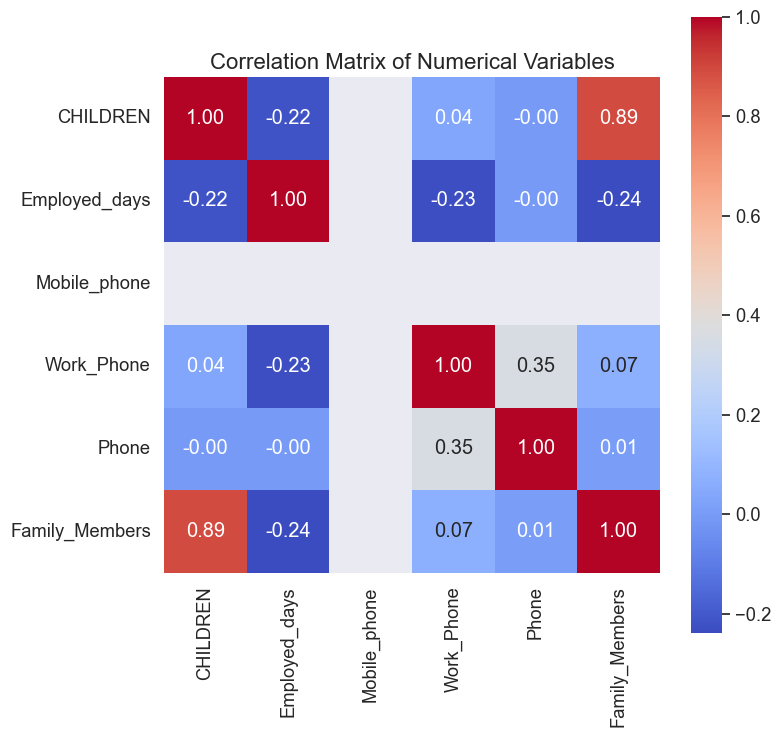

In [11]:
# Select only numerical variables
numerical_cols = ['CHILDREN', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'Family_Members']

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables', size=16)
plt.show()


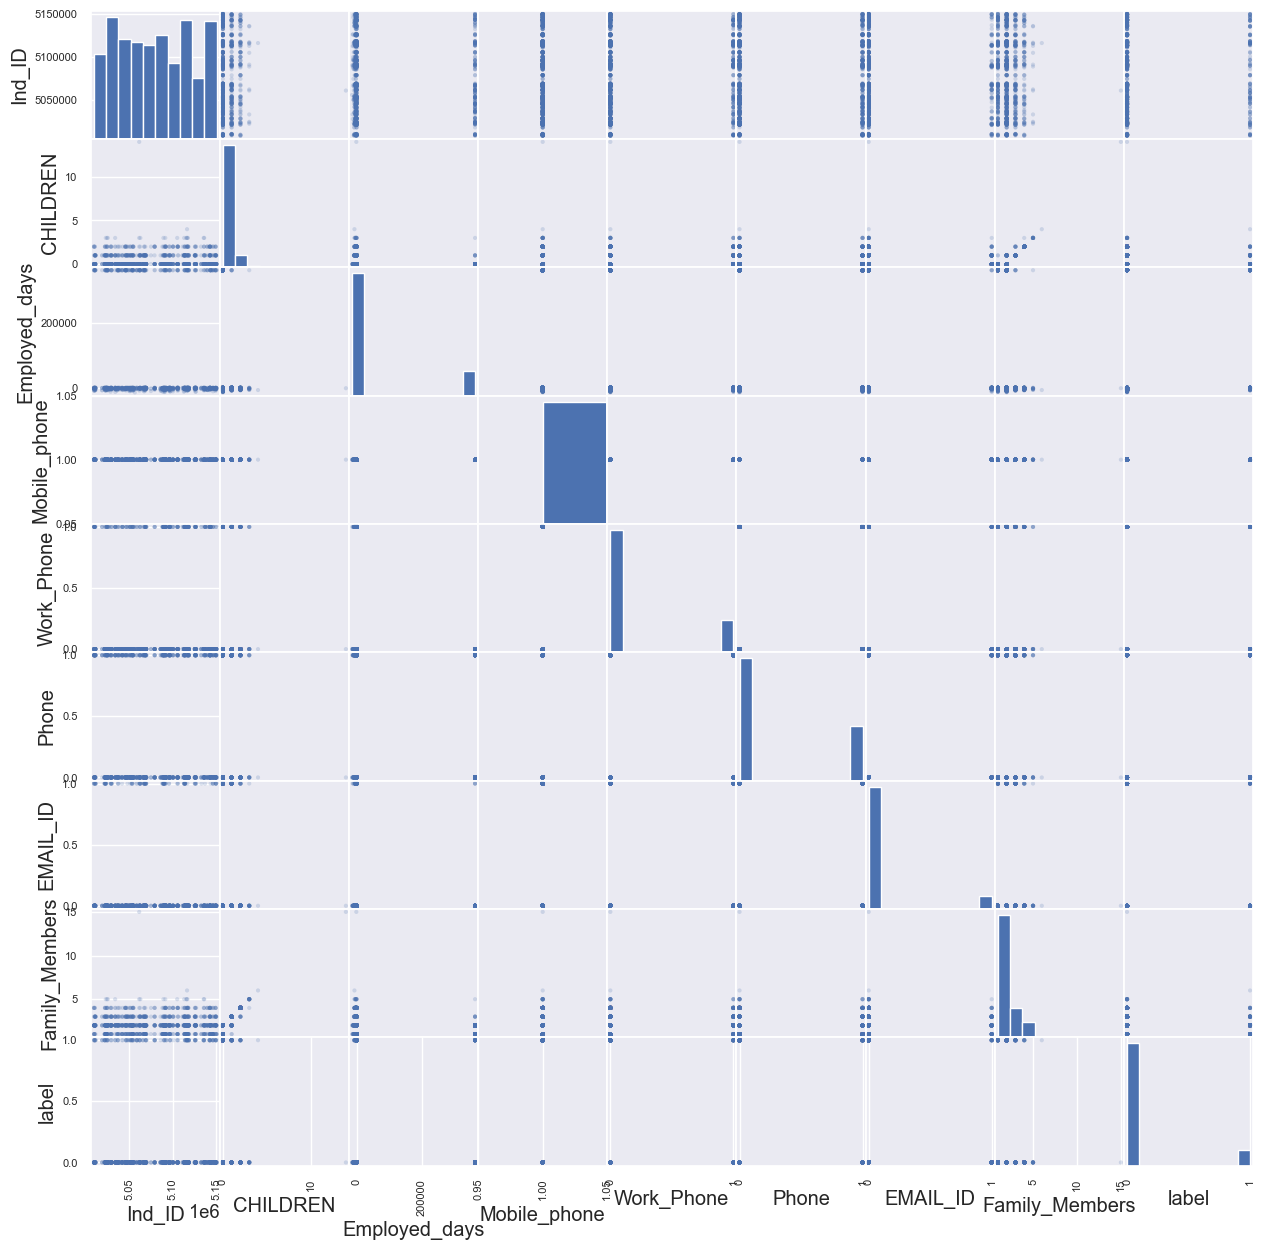

In [12]:
scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='hist')
plt.show()


The above visual suggest that there is a very high correlation between children and family members, which is quite intuitive.

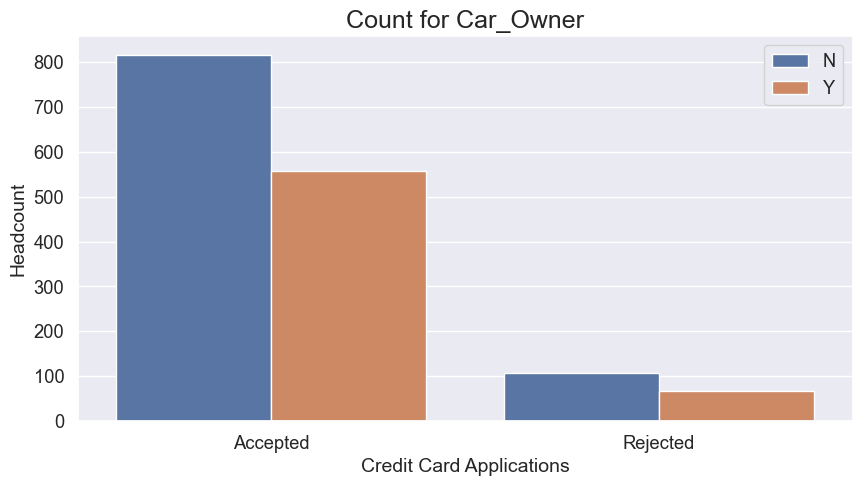

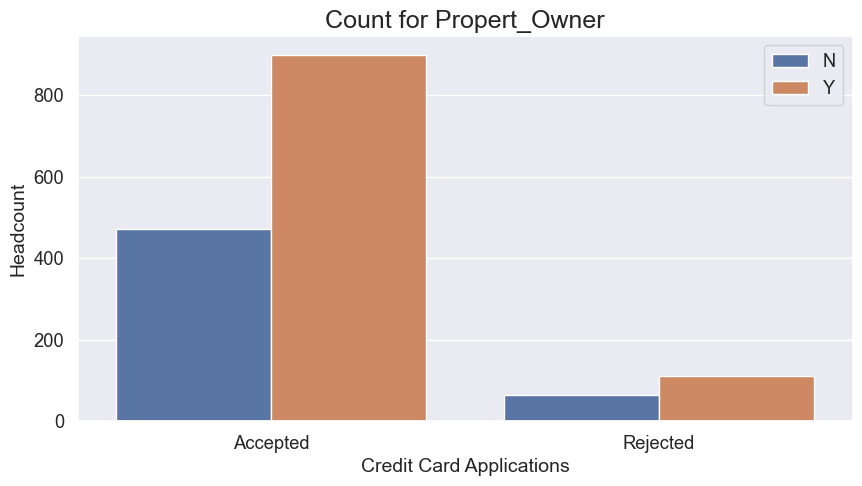

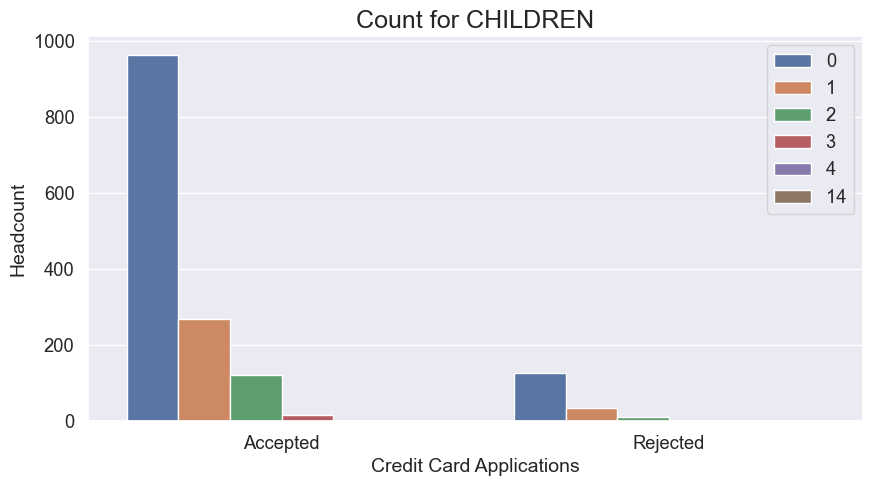

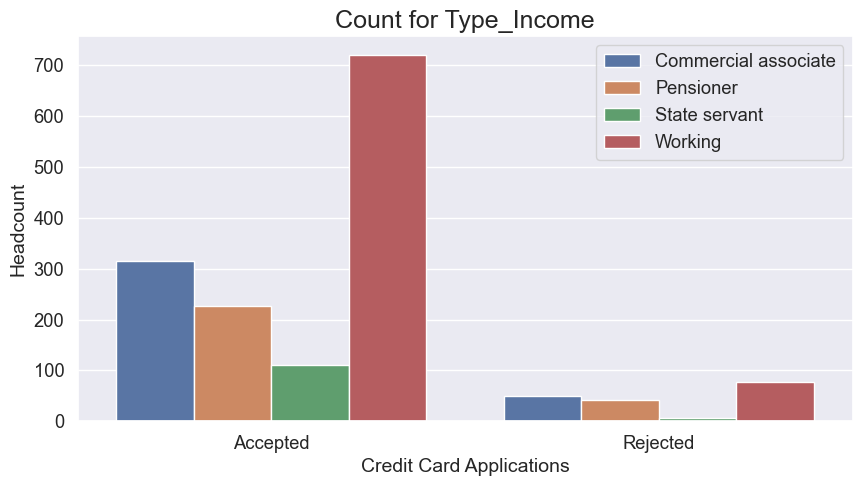

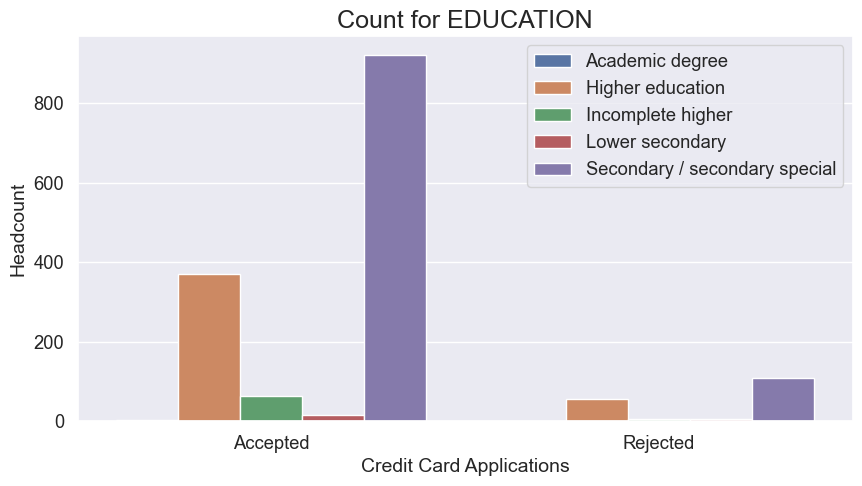

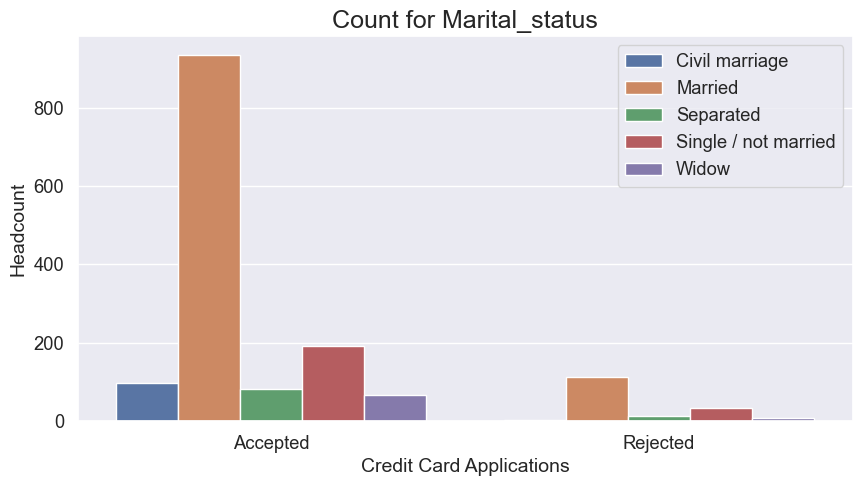

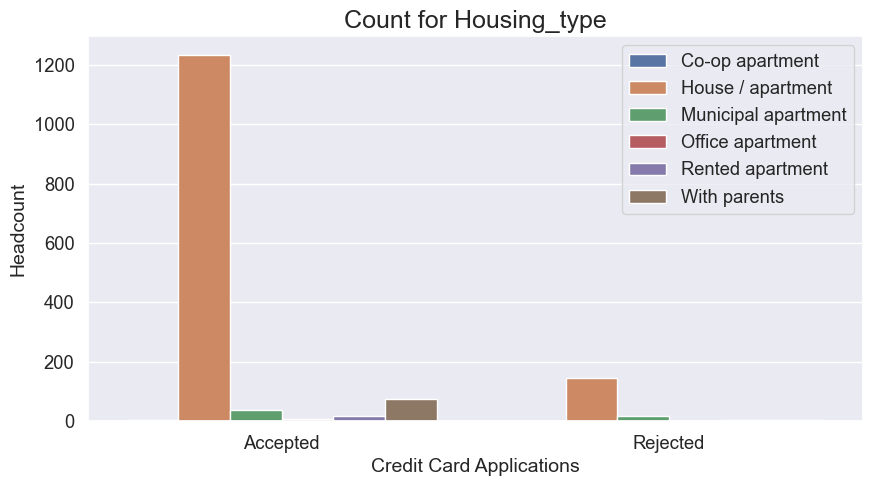

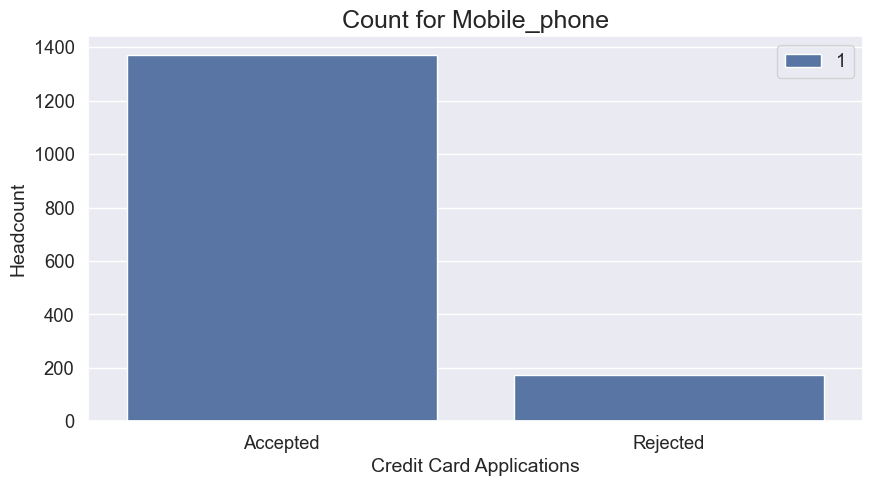

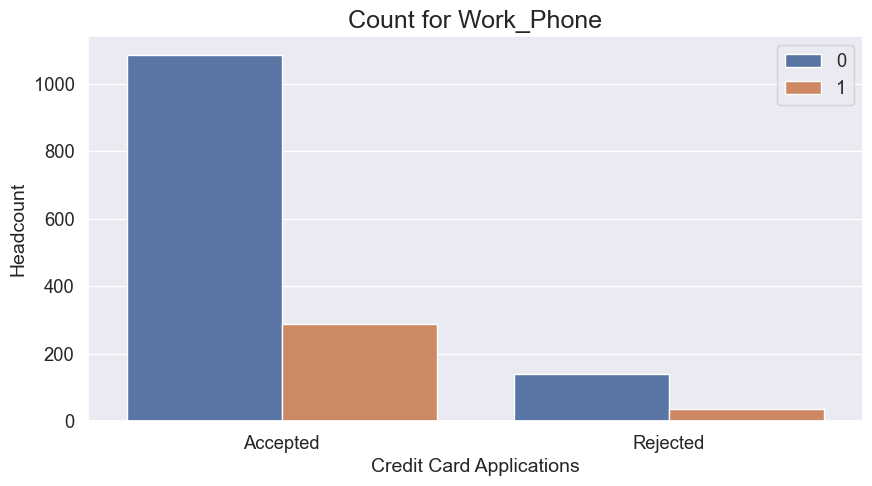

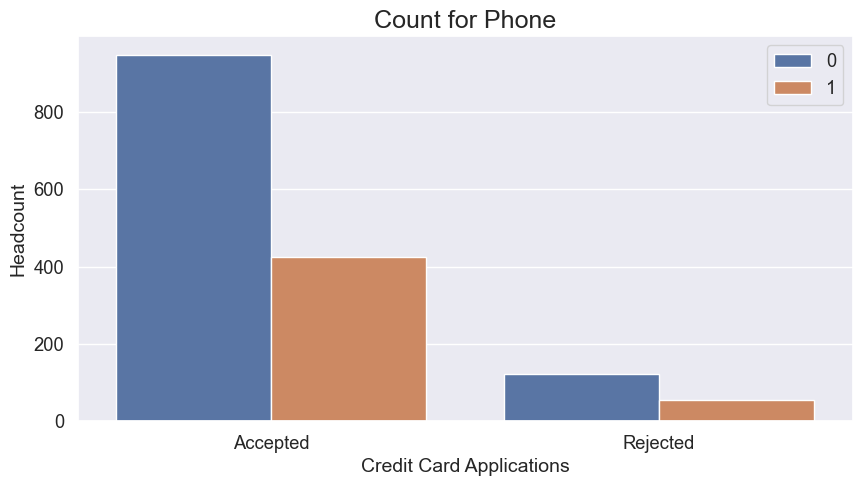

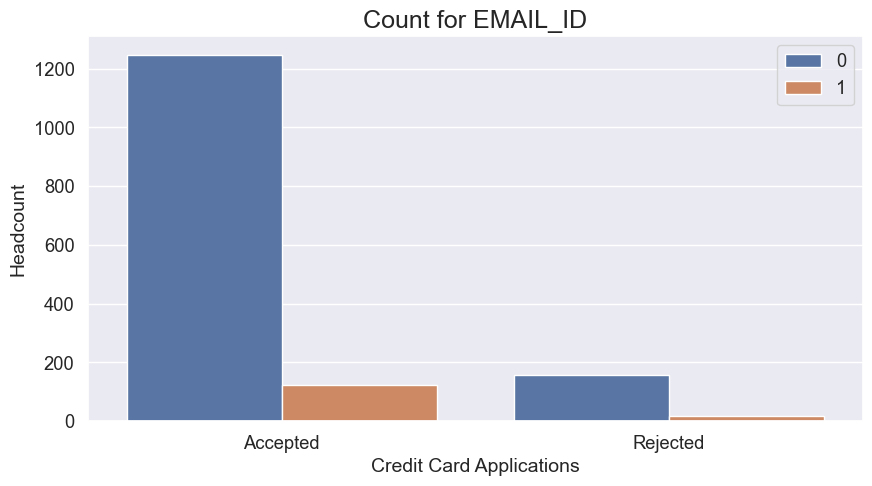

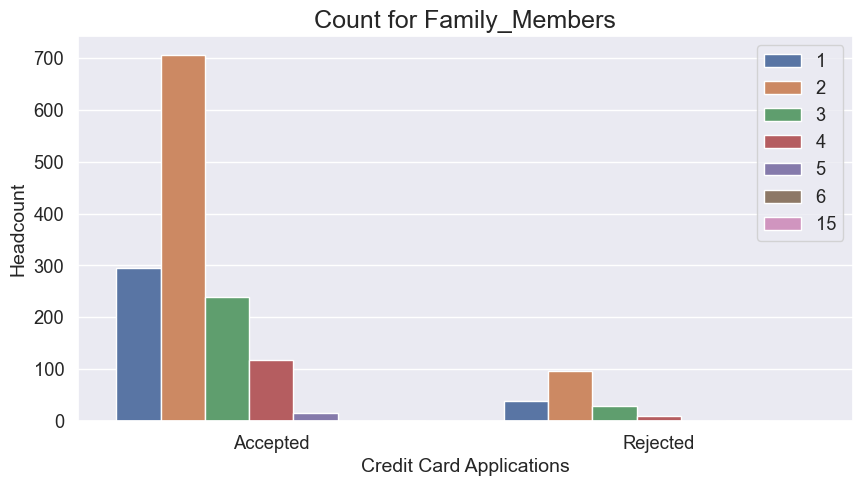

In [13]:
# Creating Visuals for each feature with thier classes showing the acception and rejection status count for them

for i in col:  
  temp =  pd.DataFrame(df.groupby(['label',i])['Ind_ID'].count().reset_index())
  dict = {0 : 'Accepted', 1 : 'Rejected'}
  temp=temp.replace({"label": dict})
  plt.figure(figsize=(10, 5))
  splot=sns.barplot(data=temp,x="label", y="Ind_ID", hue=i)
  plt.ylabel("Headcount", size=14)
  plt.xlabel("Credit Card Applications", size=14)
  plt.title(f"Count for {i}", size=18)
  splot.legend(loc='upper right')
  plt.show()

After conducting an Exploratory Data Analysis (EDA) of a credit card application dataset, it was found that:

1. Car ownership did not have a significant impact on the acceptance or rejection of credit card applications. However, applicants who did not own a car had a slightly higher acceptance rate.

2. Applicants who own property had a higher chance of getting their credit card application accepted compared to those who do not own property.

3. Applicants with no children had the highest acceptance rate among those with 2, 3 or more children.

4. Employed applicants had a significantly higher acceptance rate compared to state servants, who had the lowest acceptance rate. This pattern was also observed for rejected applications.

5. Applicants with a secondary education level had the highest acceptance rate, while those with a higher education level had the second-highest acceptance rate.

6. Married applicants had a higher chance of getting their credit card application accepted compared to single, separated, widowed, or civil marriage applicants.

7. Applicants who own a house/apartment had the highest chance of getting their credit card application accepted, while those who live with their parents had the second-highest chance.

8. The ownership of a mobile phone did not show any significant impact on the acceptance or rejection of credit card applications as nearly everyone owned a mobile phone in the dataset.

9. Surprisingly, the presence of an email ID increased the chance of acceptance of the credit card application.

10. Most accepted credit card applications had two family members.

## Machine Learning

In [14]:
# Creating a Function to assessing model

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def print_metrics(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Extract true positives, false positives, true negatives, and false negatives from the confusion matrix
    tn, fp, fn, tp = cm.ravel()

    # Compute accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Compute precision
    precision = tp / (tp + fp)

    # Compute recall (also known as sensitivity or true positive rate)
    recall = tp / (tp + fn)

    # Compute specificity (true negative rate)
    specificity = tn / (tn + fp)

    # Plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Print all metrics
    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall (Sensitivity): {:.2f}".format(recall))
    print("Specificity: {:.2f}".format(specificity))

In [15]:
#checking the data type for each colum
df.dtypes

Ind_ID             int64
Car_Owner         object
Propert_Owner     object
CHILDREN           int64
Type_Income       object
EDUCATION         object
Marital_status    object
Housing_type      object
Employed_days      int64
Mobile_phone       int64
Work_Phone         int64
Phone              int64
EMAIL_ID           int64
Family_Members     int64
label              int64
dtype: object

In [16]:
#importing library to encode all the string values in the data set
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
#encoding the values int columns having string values
df[["Car_Owner","Propert_Owner", "Type_Income",'EDUCATION','Marital_status','Housing_type']] = enc.fit_transform(df[["Car_Owner","Propert_Owner", "Type_Income",'EDUCATION','Marital_status','Housing_type']])

In [17]:
#checking the data type for each colum
df.dtypes

Ind_ID              int64
Car_Owner         float64
Propert_Owner     float64
CHILDREN            int64
Type_Income       float64
EDUCATION         float64
Marital_status    float64
Housing_type      float64
Employed_days       int64
Mobile_phone        int64
Work_Phone          int64
Phone               int64
EMAIL_ID            int64
Family_Members      int64
label               int64
dtype: object

In [18]:
# For 'employed days' column positive values mean the applicant is unemployeed so and negative values show the days from present day to the employement start day.
# Converting positive values to zero and negative values to postive

for i in range(len(df)):
  if df['Employed_days'].iloc[i] > 0:
    df['Employed_days'].iloc[i] = 0
  else:
    df['Employed_days'].iloc[i] = abs(df['Employed_days'].iloc[i])


In [19]:
df.head()

,Ind_ID,Car_Owner,Propert_Owner,CHILDREN,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,1.0,1.0,0,1.0,1.0,1.0,1.0,0,1,0,0,0,2,1
1,5009744,1.0,0.0,0,0.0,1.0,1.0,1.0,586,1,1,1,0,2,1
2,5009746,1.0,0.0,0,0.0,1.0,1.0,1.0,586,1,1,1,0,2,1
3,5009749,1.0,0.0,0,0.0,1.0,1.0,1.0,586,1,1,1,0,2,1
4,5009752,1.0,0.0,0,0.0,1.0,1.0,1.0,586,1,1,1,0,2,1


In [20]:
#now normalizing the values fopr employed days
for i in range(len(df)):
  df['Employed_days'].iloc[i] = (df['Employed_days'].iloc[i]-df['Employed_days'].min())/(df['Employed_days'].max()-df['Employed_days'].min())

In [21]:
df.drop(columns = 'Ind_ID',inplace = True)

In [22]:
df.head()

,Car_Owner,Propert_Owner,CHILDREN,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,1.0,1.0,0,1.0,1.0,1.0,1.0,0.000000,1,0,0,0,2,1
1,1.0,0.0,0,0.0,1.0,1.0,1.0,0.039363,1,1,1,0,2,1
2,1.0,0.0,0,0.0,1.0,1.0,1.0,0.039363,1,1,1,0,2,1
3,1.0,0.0,0,0.0,1.0,1.0,1.0,0.039363,1,1,1,0,2,1
4,1.0,0.0,0,0.0,1.0,1.0,1.0,0.039363,1,1,1,0,2,1


In [23]:
# Setting Variable for Model

Y = df['label']
X = df.drop(columns = 'label')

In [24]:
# Splitting the dataset into train and test sample
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test = train_test_split(df.drop(columns = 'label'),df.label, test_size = 0.2)

#### Logistics Regression
Logistic regression is a statistical method used to model the probability of a binary response variable, where the response variable can take only two values such as 0 or 1, true or false, success or failure, etc. Logistic regression is a type of generalized linear model and is widely used in various fields such as medical research, social sciences, marketing, and finance. The basic idea behind logistic regression is to model the relationship between the binary response variable and one or more predictor variables. The logistic regression model uses a logistic function to model the relationship between the response variable and the predictor variables. The logistic function is an S-shaped curve that maps any real-valued input to the range of 0 to 1, which makes it ideal for modeling the probability of a binary response variable. The logistic regression model is trained using a set of input data and corresponding response variables. The goal is to find the set of weights for each input variable that maximizes the likelihood of the observed data. 

In [25]:
# Using Logistic Regression Model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test) 
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

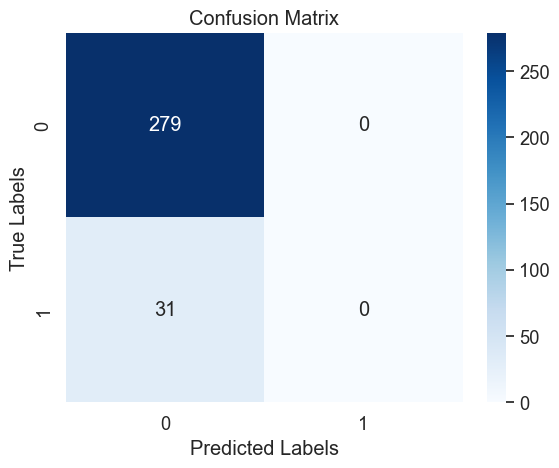

Accuracy: 0.90
Precision: nan
Recall (Sensitivity): 0.00
Specificity: 1.00


In [26]:
# Metrics for the current model
print_metrics(Y_test,Y_pred)

The high accuracy of the model with no true negative indicates that the model may be overfitting to the majority class due to data imbalance. Although high accuracy is desirable, it may not be a reliable indicator of the model's ability to generalize to new data. Instead, it is essential to evaluate the model's performance on both the majority and minority classes separately, using metrics such as precision, recall, etc.

In cases of imbalanced data, the model tends to prioritize the majority class and overlook the minority class, leading to poor classification performance for the latter. This can result in false positives and false negatives, which can be detrimental in credit card application approval, where even a single incorrect decision can have severe consequences. Therefore, it is crucial to address data imbalance by using techniques such as oversampling, undersampling, or synthetic data generation to improve the model's performance on the minority class. By doing so, the model can make more accurate predictions on both classes and reduce the risk of making costly errors in credit card application approval.

### DATA BALANCING

In [27]:
#using counter to count the number of class  occurence
from collections import Counter
sorted(Counter(df['label']).items())

[(0, 1373), (1, 175)]

The data distribution provided shows that there are two categories or classes in the dataset, 0 and 1, with 1373 instances belonging to class 0 and 175 instances belonging to class 1. This indicates that the dataset is imbalanced, with a majority of instances belonging to one class and a minority belonging to another.

In [28]:
#setting up X and Y

Y = df['label']
X = df.drop(columns = 'label')

The RandomOverSampler is a popular method for dealing with imbalanced datasets in machine learning. It is a technique for oversampling the minority class by randomly duplicating samples from the minority class until the number of samples in the minority class is equal to the number of samples in the majority class.

The theoretical approach of the RandomOverSampler is to increase the number of samples in the minority class to achieve a more balanced distribution of classes. This approach is motivated by the fact that most machine learning algorithms perform better when the training data is balanced. A balanced dataset means that each class has an equal number of samples. In contrast, an imbalanced dataset has a disproportionate number of samples for one or more classes, which can lead to poor performance of machine learning models.

The RandomOverSampler is a simple but effective method for balancing imbalanced datasets. It is computationally efficient and does not require any prior knowledge of the dataset or the underlying distribution of the data. 

In [29]:
#importing imp libraries to over sample the provided dataset
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
X_resampled,Y_resampled = ros.fit_resample(X,Y)
print(sorted(Counter(Y_resampled).items()),Y_resampled.shape)

[(0, 1373), (1, 1373)] (2746,)


In [30]:
#spliting the dataset into test and train samples
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test = train_test_split(X_resampled,Y_resampled, test_size = 0.1)

The initial results of fitting and modeling the data revealed an unbalanced dataset that was affecting the accuracy of the model. In order to address this issue, an oversampling technique was employed to balance the dataset and improve the model's performance. The oversampling technique used increased the number of instances of the minority class to match that of the majority class.

By balancing the dataset using the oversampling technique, the model is now able to better learn the patterns and characteristics of both the majority and minority classes. This will result in improved accuracy, precision, and recall metrics for the model.

#### LOGISTIC REGRESSION

In [31]:
#using Logistic Regression
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print (Y_pred)

[1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1
 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0
 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1
 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0
 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1
 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0
 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0]


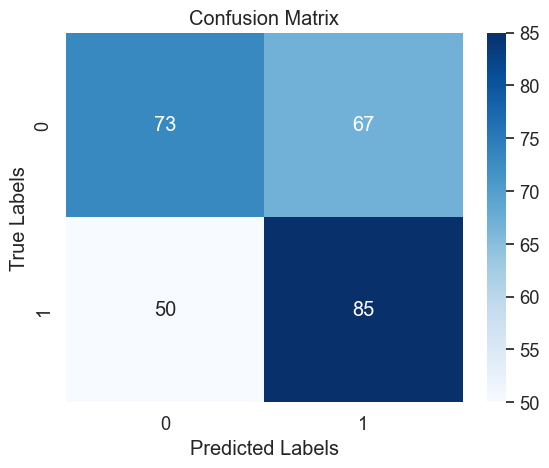

Accuracy: 0.57
Precision: 0.56
Recall (Sensitivity): 0.63
Specificity: 0.52


In [32]:
# Metrics for the current model
print_metrics(Y_test,Y_pred)

#### RANDOM FOREST

Random forest is a popular machine learning algorithm used for classification, regression, and other tasks that involve decision trees. It is a type of ensemble learning method that constructs a multitude of decision trees at training time and outputs the class that is the mode of the classes of the individual trees. Random forest creates multiple decision trees by selecting random samples of the data and random subsets of the features to be used for each tree. The final classification is then determined by taking the mode of all the classifications made by each tree. This helps to reduce the risk of overfitting, which can occur when using a single decision tree. Random forest has several advantages over other algorithms, including its ability to handle large datasets, high accuracy, and ability to handle missing data. It is also relatively easy to use and interpret, and can handle both numerical and categorical data.

In [43]:
# Using Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 7, random_state=0)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
print(Y_pred)

[1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1
 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0
 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0
 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0
 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0]


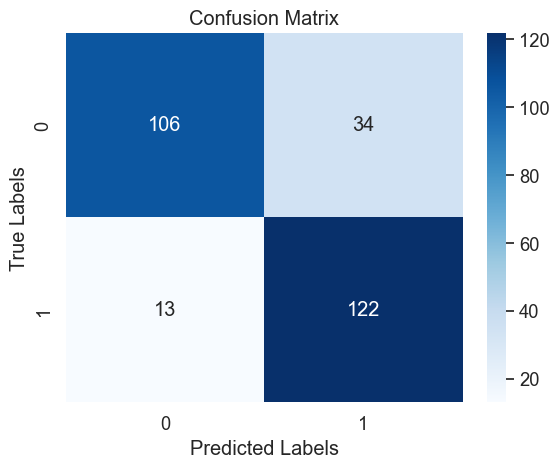

Accuracy: 0.83
Precision: 0.78
Recall (Sensitivity): 0.90
Specificity: 0.76


In [44]:
# Metrics for the current model
print_metrics(Y_test,Y_pred)

After conducting a thorough evaluation of the logistic regression and random forest classifier models for the given problem, it was observed that the random forest classifier achieved a higher accuracy score compared to the logistic regression model. Based on this, it was concluded that the random forest classifier is a more suitable choice for this problem.

As it is also capable of handling large datasets and high-dimensional feature spaces, which makes it an effective tool for classification problems.

The HalvingGridSearchCV method is being utilized to optimize the model's precision and accuracy by selecting the best hyperparameters. This method is a technique of hyperparameter tuning that aims to find the optimal parameter set by selecting a subset of the parameters and evaluating the model. By doing so, it reduces the time needed for optimization and provides better accuracy with a smaller number of parameter settings to evaluate. Hence, by utilizing this method, the model can be fine-tuned to achieve its best performance on the given dataset.


In [52]:
# using grid search method to find best parameters for the model to enhance  accuracy

from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

clf = RandomForestClassifier(random_state=0)

param_grid = {"max_depth": np.arange(3, 10),
              "min_samples_split": [2, 5, 10, 20, 30]}
search = HalvingGridSearchCV(clf, param_grid, resource='n_estimators',
                             max_resources=10,
                             cv = 3,
                             random_state=0).fit(X_train, Y_train)
print(search.best_params_)

{'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 9}


In [53]:
# using Model with the best parameters for more accurate results
clf = RandomForestClassifier(min_samples_split= 2, n_estimators=9)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

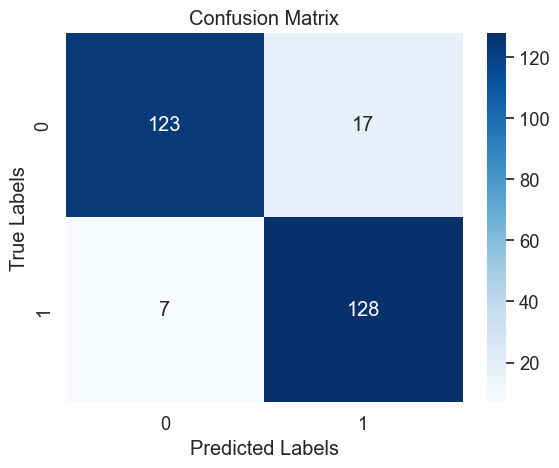

Accuracy: 0.91
Precision: 0.88
Recall (Sensitivity): 0.95
Specificity: 0.88


In [54]:
# Metrics for the current model
print_metrics(Y_test,Y_pred)

In [55]:
#finding features importances
importances = clf.feature_importances_

# Print the feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

Car_Owner: 0.052523982723808975
Propert_Owner: 0.04928976174558998
CHILDREN: 0.0465070951269462
Type_Income: 0.06193196821879316
EDUCATION: 0.0646976190691797
Marital_status: 0.07856429583311592
Housing_type: 0.04800332887608434
Employed_days: 0.42234918692882645
Mobile_phone: 0.0
Work_Phone: 0.038410134528958466
Phone: 0.04364628080517122
EMAIL_ID: 0.024892746418240116
Family_Members: 0.06918359972528546


The above table shows the feature importance. It can change on every run as the grid search brings some randomness to the data

# Cost function

The cost function is a custom cost function designed for credit card application approval. The function calculates the total cost of accepting a bad application (Type II error) and rejecting a good application (Type I error). False positives (rejecting good applications) are assigned a cost of 5, and false negatives (accepting bad applications) are assigned a cost of 10. The total cost is then calculated by summing the cost of all false positives and false negatives.

By using this custom cost function as the loss function during training, the model is optimized to minimize the total cost of errors rather than just the number of incorrect predictions. This is a common approach in situations where the cost of false positives and false negatives is not equal, as it allows the model to be tailored to the specific needs of the problem at hand.

In [56]:
# Define custom cost function
def custom_cost_function(y_true, y_pred):
    # False positive: the cost of rejecting a good application (Type I error)
    fp_cost = 5
    # False negative: the cost of accepting a bad application (Type II error)
    fn_cost = 10
    # Calculate the total cost
    total_cost = np.sum(y_true[y_pred == 0]) * fp_cost + np.sum((1 - y_true)[y_pred == 1]) * fn_cost
    return total_cost

In [57]:
# Currently total cost of our model
custom_cost_function(Y_test,Y_pred)

205

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create a random forest classifier
rfc = RandomForestClassifier()

# Define the parameter grid to search over
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': np.arange(8, 20),
              'min_samples_split': [2, 5, 10, 20, 30]}

# Define the scoring metric as the custom cost function
scoring = make_scorer(custom_cost_function, greater_is_better=False)

# Perform grid search to find the best parameters
grid_search = GridSearchCV(rfc, param_grid=param_grid, scoring=scoring)
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best cost: ", abs(grid_search.best_score_))

Best parameters:  {'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 200}
Best cost:  290.0


In [60]:
#re running the model with cost parameters

from sklearn.ensemble import RandomForestClassifier

# Set the parameters
params = {'max_depth': None, 'n_estimators': 200,'min_samples_split': 5}

# Create the Random Forest Classifier model
rfc = RandomForestClassifier(**params)

# Train the model on your data
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)

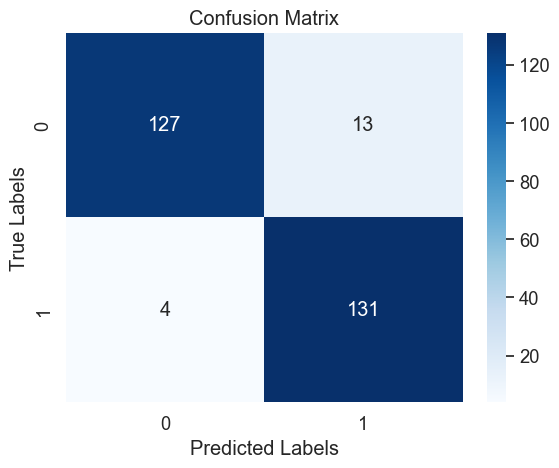

Accuracy: 0.94
Precision: 0.91
Recall (Sensitivity): 0.97
Specificity: 0.91


In [61]:
# Metrics for the current model
print_metrics(Y_test,Y_pred)

In [62]:
# after implying cost reduction parameters
custom_cost_function(Y_test,Y_pred)

150

The perfrormence using the custom cost function improved the overall performance.